In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import mglearn
from IPython.display import display
plt.rc('font', family='Verdana')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score

In [5]:
df = pd.read_csv(r'..\..\..\datasets\ORGANICS.csv', encoding='cp1251')
df

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22218,52834058,13.0,65.0,9.0,B,F,South East,London,Silver,1500.00,5.0,0,0
22219,52834376,15.0,73.0,34.0,D,U,South East,S & S East,Gold,6053.06,12.0,0,0
22220,52837057,9.0,70.0,15.0,B,F,North,Yorkshire,Gold,6000.00,5.0,0,0
22221,52838096,11.0,66.0,8.0,B,F,North,N West,Silver,5000.00,5.0,0,0


In [6]:
df = df.fillna(df.mean())

In [7]:
X = df[['DemAffl', 'DemAge', 'DemCluster', 'PromSpend', 'PromTime']]
y = df['TargetBuy']
y = y.astype('int')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [19]:
# создаем экземпляр модели и подгоняем его на обучающем наборе
DT = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
# оцениваем качество модели на тестовом наборе
print("Правильность на обуч наборе: {:.2f}".format(DT.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(DT.score(X_test, y_test)))

Правильность на обуч наборе: 0.80
Правильность на тестовом наборе: 0.81


Найдем долю правильных ответов полученного алгоритма на обучающей выборке (в процентах).

In [20]:
y_pred_train = DT.predict(X_train)
accuracy_score(y_pred_train, y_train)

0.8034439311213776

Теперь найдем долю правильных ответов полученного алгоритма на тестовой выборке

In [21]:
y_pred = DT.predict(X_test)
accuracy_score(y_pred, y_test)

0.8052555795536357

## Стратифицированная k-блочная перекрестная проверка и другие стратегии

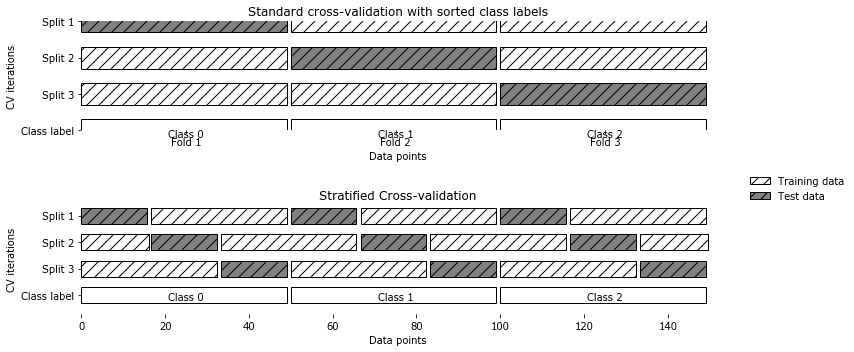

In [22]:
mglearn.plots.plot_stratified_cross_validation()

### More control over cross-validation

In [23]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [27]:
print("Значения правильности перекрестной проверки:\n{}".format(
      cross_val_score(DT, X, y, cv=kfold)))

Значения правильности перекрестной проверки:
[0.79932508 0.8071991  0.80292463 0.7929793  0.80153015]


In [28]:
kfold = KFold(n_splits=3)
print("Значения правильности перекрестной проверки:\n{}".format(
    cross_val_score(DT, X, y, cv=kfold)))

Значения правильности перекрестной проверки:
[0.80426566 0.80089093 0.79492372]


#### Перекрестная проверка со случайными перестановками при разбиении

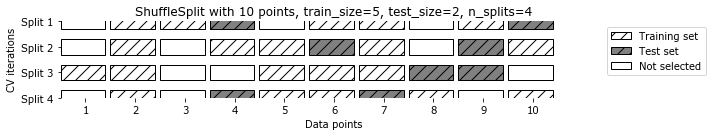

In [30]:
mglearn.plots.plot_shuffle_split()

In [31]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(DT, X, y, cv=shuffle_split)
print("Значения правильности перекрестной проверки:\n{}".format(scores))

Значения правильности перекрестной проверки:
[0.79310655 0.80885529 0.79409647 0.79553636 0.80282577 0.79670626
 0.79535637 0.80147588 0.79859611 0.79886609]


### Подбор оптимальных параметров

In [33]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(DecisionTreeClassifier(random_state=13),
                  param_grid = {'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10, None],
                                'max_features' : ['auto', 'log2', None],
                                'min_samples_leaf' : range(1, 10),
                                'min_samples_split' : range(2, 10),
                                'criterion' : ['gini', 'entropy']},
                  cv=5, scoring='accuracy'
                  ).fit(X_train, y_train)

In [34]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [35]:
gs.best_score_

0.8009239815203696